<a href="https://colab.research.google.com/github/drpetros11111/TS_UD_Tr/blob/main/Section_7_(Prices)_The_AR_Model_Completed_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the relevant packages


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima.model import ARIMA # Changed from ARMA to ARIMA
from scipy.stats.distributions import chi2
import statsmodels.tsa.stattools as sts
import seaborn as sns
sns.set()

# This code imports several Python libraries commonly used for data analysis and time series modeling:

------
    import pandas as pd
Imports the pandas library, which is essential for working with data in DataFrames (like tables).

The as pd part gives it a shorter nickname for easier use.

---------------------------
    import numpy as np

Imports the NumPy library, widely used for numerical operations, especially with arrays.

It's nicknamed np.

-----------------------
    import matplotlib.pyplot as plt

Imports the pyplot module from the Matplotlib library, which is used for creating static, interactive, and animated visualizations in Python.

It's nicknamed plt.

---------------------------
    import statsmodels.graphics.tsaplots as sgt

Imports the tsaplots module from statsmodels.graphics, which is used for creating time series plots like ACF and PACF plots.

It's nicknamed sgt.

---------------------------------
    from statsmodels.tsa.arima_model import ARMA

Imports the ARMA model specifically from the statsmodels.tsa.arima_model module. This is used for time series forecasting.

----------------
    from scipy.stats.distributions import chi2

Imports the chi2 distribution from the scipy.stats.distributions module.

This is often used in statistical tests, like the LLR test in this notebook.

----------------------------
    import statsmodels.tsa.stattools as sts

Imports the stattools module from statsmodels.tsa, which provides various statistical tests and tools for time series analysis, such as the Augmented Dickey-Fuller test.

It's nicknamed sts.

--------------------------

    import seaborn as sns

Imports the Seaborn library, which is built on top of Matplotlib and provides a high-level interface for drawing attractive statistical graphics. It's nicknamed sns.

----------------
    sns.set()

This line applies Seaborn's default aesthetic settings to the plots, making them visually more appealing.

## Importing the Data and Pre-processing

In [18]:
raw_csv_data = pd.read_csv("/content/Index2018.csv")
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')

/tmp/ipython-input-295742161.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_comp=df_comp.fillna(method='ffill')


In [19]:
df_comp['market_value']=df_comp.ftse

In [20]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

## The ACF

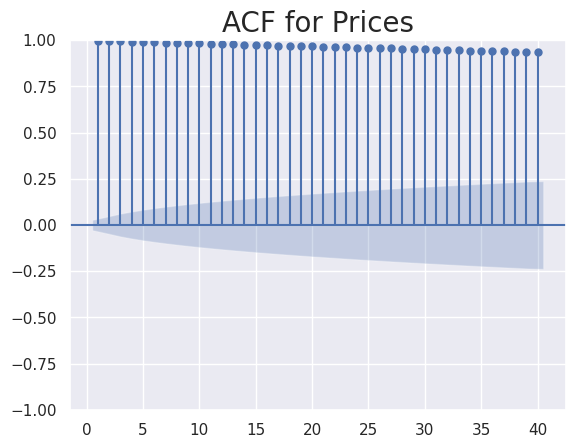

In [21]:
sgt.plot_acf(df.market_value, zero = False, lags = 40)
plt.title("ACF for Prices", size = 20)
plt.show()

In [22]:
import warnings
warnings.filterwarnings("ignore")

## The PACF

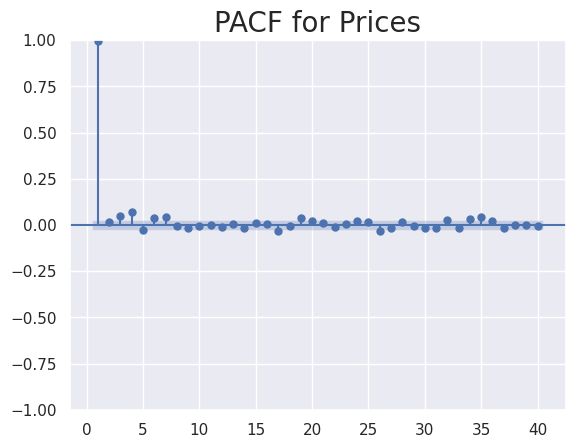

In [23]:
sgt.plot_pacf(df.market_value, lags = 40, alpha = 0.05, zero = False, method = ('ols'))
plt.title("PACF for Prices", size = 20)
plt.show()

## The AR(1) Model

In [24]:
model_ar = ARIMA(df.market_value, order=(1,0,0)) # Changed from ARMA to ARIMA and added integrated order

In [25]:
results_ar = model_ar.fit()

In [26]:
results_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -27622.604
Date:                Tue, 19 Aug 2025   AIC                          55251.207
Time:                        16:37:27   BIC                          55270.772
Sample:                    01-07-1994   HQIC                         55258.063
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6374    423.329     12.023      0.000    4259.929    5919.346
ar.L1          0.9984      0.001   1147.578      0.000       0.997       1.000
sigma2      3511.3841     40.874     85.907      0.000    3431.272    3591.496
===================================================================================
Ljung-Box (L1) (Q):                   1.51   Jarque-Bera (JB):              3313.33
Prob(Q):                              0.22   Prob(JB):                         0.00
Heteroskedasticity (H):               1.90   Skew:                            -0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# The image shows the results of an **ARMA(1, 0)** model, which is an Autoregressive Moving Average model.

Let's break down the key sections and variables in this output.

------------------------------
### Model Summary 📈

* **Dep. Variable**: The dependent variable, or the time series being modeled, which is **`market_value`**.

-----------------------
* **Model**: Specifies the type of model used, **`ARMA(1, 0)`**. This means it's an Autoregressive model of order 1 (AR=1) and a Moving Average model of order 0 (MA=0).

---------------------------------
* **No. Observations**: The number of data points used in the model, which is **5021**.

-------------------------------------
---------------------------------------
* **Log Likelihood**: A measure of the model's fit. Higher values are better. This value is used to calculate the information criteria.

Log-likelihood is a statistical measure used to evaluate how well a model fits the data it was trained on. It is a key component in a method called **Maximum Likelihood Estimation (MLE)**, which is often used to find the best parameters for a statistical model.

### How it Works 🧠

The concept of likelihood refers to the probability of observing the given data, assuming a particular set of model parameters. The log-likelihood is simply the logarithm of this likelihood. We use the logarithm because it simplifies calculations and turns products into sums, which are easier to work with.

* **High Log-Likelihood**: A higher log-likelihood value (closer to zero or less negative) indicates that the observed data is more probable under the model. This means the model is a better fit for the data.
* **Low Log-Likelihood**: A low (more negative) log-likelihood value means the data is less probable, indicating a poor model fit.

### Example 🎯

Imagine you have a coin and you want to know if it's fair. You flip it 10 times and get 8 heads.

* **Model 1 (Fair Coin)**: The probability of getting a head is 0.5. The likelihood of your result (8 heads) would be very low. The log-likelihood would be a large negative number.
* **Model 2 (Biased Coin)**: A model that assumes the probability of a head is 0.8 would have a much higher likelihood of observing 8 heads. The log-likelihood would be closer to zero (less negative), making it a better model.

In the ARMA model results you provided, the log-likelihood of -27622.598 is a very negative number. This is common for time series models with a large number of observations. It's not a value you interpret in isolation but rather use to compare different models for the same data. A model with a log-likelihood of -25000 would be considered a better fit for the data than the one shown.

---------------
------------------
* **Method**: The method used to estimate the model's parameters, which is `css-mle` (Conditional Sum of Squares followed by Maximum Likelihood Estimation).

Okay, my apologies for the misunderstanding. Let's focus on the `css-mle` explanation and example.

***

### CSS-MLE: The Two-Step Process

`css-mle` is a hybrid method used to fit time series models like ARMA and ARIMA. It combines two different techniques to get the best of both worlds: the speed of **Conditional Sum of Squares (CSS)** and the accuracy of **Maximum Likelihood Estimation (MLE)**.

1.  **CSS (The Initial Guess)**: This first step is a quick and dirty way to find a good starting point for the model's parameters. It works by minimizing the sum of the squared prediction errors. Think of it as taking an educated guess. It's not perfectly accurate, but it gets you close to the right answer.

2.  **MLE (The Final Refinement)**: The second step takes the initial guess from CSS and fine-tunes it. MLE finds the parameters that maximize the **log-likelihood**, which is a measure of how well the model explains the observed data. This process is more computationally intensive but is much more precise.

Using CSS to find a starting point for MLE is a clever trick. It makes the overall process of finding the optimal model parameters much faster and more reliable than if MLE had to start its search from a random point.

### A Simple Analogy

Imagine you've lost your keys in a big, dark field.

1.  **CSS is like using a metal detector.** The metal detector quickly scans a wide area and gives you a general idea of where the keys are. It's not precise, but it tells you, "The keys are probably in that spot over there." This gives you a good starting point for your search.

2.  **MLE is like shining a flashlight.** Once you're in the right area (thanks to the metal detector), you pull out a flashlight and carefully search the ground to find the exact location of the keys. You're using a more powerful and precise tool, but it only works because you're already close to your goal.

In this analogy, the metal detector (CSS) provides a fast, initial guess, and the flashlight (MLE) provides the accurate, final solution. They work together to solve the problem efficiently.

---------------------
--------------------------
* **AIC, BIC, HQIC**: The **Akaike Information Criterion (AIC)**, **Bayesian Information Criterion (BIC)**, and **Hannan-Quinn Information Criterion (HQIC)** are used to compare different models. Lower values generally indicate a better-fitting model.

AIC, BIC, and HQIC are statistical tools used to select the best model from a set of candidates.

They are all **information criteria** that penalize a model for having too many parameters, helping you find the right balance between how well a model fits the data and how complex it is.

A model with a **lower score** on any of these criteria is generally preferred.

### What the Scores Mean

All three criteria work similarly: they reward models that fit the data well and penalize models that are too complex.

The general idea is:

$\text{Information Criterion} = -2 \times \text{Log-Likelihood} + \text{Penalty for Complexity}$

* **Log-Likelihood**: This measures how well the model fits the data. A higher log-likelihood (less negative) indicates a better fit.

The first part of the equation, $-2 \ln(L)$, rewards a good fit.

* **Penalty for Complexity**: This part increases as the number of parameters ($k$) in the model grows.

This is crucial because adding more parameters will almost always improve the fit, but it can also lead to **overfitting**.

The difference between AIC, BIC, and HQIC lies in how they calculate the penalty.

* **AIC (Akaike Information Criterion)**: It has a relatively weak penalty for complexity. It's more likely to choose a more complex model, which can be good for predicting future data but sometimes leads to overfitting.
    * **Formula**: $AIC = -2 \ln(L) + 2k$
* **BIC (Bayesian Information Criterion)**: It has a much stronger penalty for complexity, especially with a large number of data points. It tends to favor simpler, more parsimonious models.
    * **Formula**: $BIC = -2 \ln(L) + k \ln(n)$
* **HQIC (Hannan-Quinn Information Criterion)**: It sits somewhere between AIC and BIC, offering a moderate penalty.

### Simple Example

Imagine you're trying to choose between two forecasting models for a time series:

* **Model A (Simple)**: An ARMA(1,1) model with 3 parameters (1 AR, 1 MA, 1 constant).
* **Model B (Complex)**: An ARMA(5,5) model with 11 parameters (5 AR, 5 MA, 1 constant).

Model B will likely fit the historical data better, but it might be "overfitting" by memorizing noise. To decide which is better for forecasting, you'd check the information criteria scores.

| Model | AIC | BIC |
| :--- | :--- | :--- |
| Model A | **100** | **110** |
| Model B | 102 | 120 |

In this case, **Model A** is the clear winner because it has lower scores on both AIC and BIC.

This suggests that despite Model B's potentially better fit to the historical data, its complexity isn't justified, and Model A is a better choice for making future predictions.

***

-----------------
------------------------
### Coefficients and Statistical Significance 📊

This section provides the estimated coefficients and their statistical significance.

### What is a Constant Term? 💡

The constant term, or intercept, in a statistical model represents the **base value** of the dependent variable when all other variables are zero. In a time series model, it represents the **long-run mean** of the series, assuming it is stationary. It's the central point around which the data is expected to fluctuate.

For example, in the ARMA model you provided, the constant term of 5057.0038 would be the long-run average of the `market_value` series if it were stationary.

***

### The Null Hypothesis of the Constant Term 📊

The null hypothesis for the constant term is that it is equal to zero.

* **Null Hypothesis ($H_0$)**: The constant term is zero.
* **Alternative Hypothesis ($H_a$)**: The constant term is not zero.

If the p-value for the constant term is less than your significance level (e.g., 0.05), you **reject the null hypothesis** and conclude that the constant term is statistically significant and a meaningful part of the model.

***

### Constant Term in Non-Stationary Data 📉

When a time series is **not stationary**, the constant term in an ARMA model no longer represents a stable, long-run mean. A non-stationary series, such as one with a trend, has a mean that changes over time.

In this case, the constant term in the model would be an invalid and misleading interpretation of the data's behavior. Instead of representing a stable mean, it might attempt to capture the drift or trend of the series, which is a key characteristic of non-stationary data. This is why it's critical to transform a non-stationary series (e.g., by differencing) before fitting a model to it. The constant term in a model on a differenced series would then represent the mean of the *changes* in the original series, not the mean of the series itself.

* **const**: The constant term in the model. Its coefficient is **5057.0038**, and since its p-value is **0.000**, it is highly significant. The confidence interval ([0.025, 0.975]) also confirms this, as it does not contain zero.
* **ar.L1.market_value**: This is the key autoregressive term.
    * **coef**: The estimated coefficient for the first lag of the dependent variable, which is **`0.9985`**.
    
    This means that the current `market_value` is strongly correlated with its previous value.
    
    A value very close to 1 suggests a behavior similar to a **random walk** and indicates the series is likely non-stationary.
    
    A coefficient for the first lag of the dependent variable that is very close to 1 suggests a behavior similar to a random walk and indicates non-stationarity because it implies that a shock or random change to the series has a persistent, permanent effect.

### The Mechanism of a Unit Root 🚶

The autoregressive part of a time series model can be represented by the equation:
$Y_t = \text{const} + \phi Y_{t-1} + \epsilon_t$

Here, $\phi$ is the coefficient for the first lag.

* If $\phi$ is **less than 1** (e.g., 0.8), any random shock ($\epsilon_t$) will gradually die out.

The impact of the shock diminishes over time, and the series tends to revert to its mean. The further the series deviates from the mean, the stronger the force pulling it back.

This is the definition of a **stationary** series.

* If $\phi$ is **equal to 1**, the series has a **unit root**. The equation becomes $Y_t = \text{const} + Y_{t-1} + \epsilon_t$.

In this case, any shock ($\epsilon_t$) is **permanently incorporated** into the series' value. The series "remembers" the shock and carries it forward indefinitely.

This behavior is characteristic of a **random walk**, which is a non-stationary process.

The coefficient of **0.9985** from your model is extremely close to 1. This means the shock's effect is almost permanent, and the series will not revert to its mean.

The statistical tests in your output confirm this; the root is 1.0015, which is greater than 1, and the coefficient is statistically indistinguishable from 1. This all points to a **non-stationary** series.

    * **std err**: The standard error of the coefficient estimate.
    * **z**: The z-statistic, which is the coefficient divided by the standard error. A large z-statistic (here, 1298.863) indicates a highly significant coefficient.
    * **P>|z|**: The p-value. A value of **`0.000`** (less than 0.05) means the coefficient is statistically significant.
    * **[0.025, 0.975]**: The 95% confidence interval for the coefficient.

***

--------------------
--------------------

### Roots Section 🌳

This section is crucial for checking the **stationarity** of the model.

* **AR.1**: Refers to the first autoregressive root.
    * **Real**: The real part of the root. A value of **`1.0015`** here is the key finding.
    * **Modulus**: The absolute value of the root. A root with a modulus **greater than 1** (here, 1.0015) indicates that the time series is **non-stationary**.

    In time series analysis, a **root** is a value that helps determine if a model or a time series is **stationary** or **non-stationary**. It is a solution to the characteristic equation of an autoregressive (AR) process.

### The Role of the Root

The location of a root is critical:

* **Inside the Unit Circle (Modulus < 1)**: If all the roots of a model's characteristic equation are inside the unit circle (i.e., their absolute value or modulus is less than 1), the time series is **stationary**. This means that any random shock to the series will eventually die out, and the series will revert to its mean.

* **On the Unit Circle (Modulus = 1)**: If a root is exactly on the unit circle, the series has a **unit root**. This indicates that the series is **non-stationary**, and any shock will have a permanent effect. The series will behave like a random walk.

* **Outside the Unit Circle (Modulus > 1)**: If a root is outside the unit circle, the series is also **non-stationary**. Any shock will not only have a permanent effect but will also grow over time, leading to an explosive series. This is often an indication that the model is misspecified.

### How to Find a Root

For a simple AR(1) model: $Y_t = \phi Y_{t-1} + \epsilon_t$, the characteristic equation is: $1 - \phi z = 0$.

The root is found by solving for $z$: $z = 1/\phi$.

* If the coefficient $\phi$ is 0.5, the root is $1/0.5 = 2$, which is outside the unit circle.
* If $\phi$ is 1, the root is 1, which is on the unit circle (a unit root).

In a statistical software output, like the one you shared, the roots are calculated for you. The output **`AR.1 1.0015 +0.0000j 1.0015 0.0000`** shows a root with a modulus of 1.0015, which is greater than 1. This confirms that the series is non-stationary.

The presence of a root greater than 1 confirms the conclusion from the `ar.L1` coefficient (0.9985) that the series is a random walk and not stationary. This suggests that the ARMA(1,0) model is not the correct model and that the series likely needs to be differenced (transformed into an ARIMA model) before it can be effectively modeled.

## Higher-Lag AR Models

In [27]:
model_ar_2 = ARIMA(df.market_value, order=(2,0,0)) # Changed from ARMA to ARIMA and added integrated order
results_ar_2 = model_ar_2.fit()
results_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(2, 0, 0)   Log Likelihood              -27621.949
Date:                Tue, 19 Aug 2025   AIC                          55251.898
Time:                        16:37:42   BIC                          55277.984
Sample:                    01-07-1994   HQIC                         55261.039
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6409    368.251     13.821      0.000    4367.881    5811.400
ar.L1          0.9811      0.010     99.868      0.000       0.962       1.000
ar.L2          0.0171      0.010      1.749      0.080      -0.002       0.036
sigma2      3510.1277     41.037     85.535      0.000    3429.696    3590.560
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3282.81
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               1.89   Skew:                            -0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [28]:
model_ar_3 = ARIMA(df.market_value, order=(3,0,0)) # Changed from ARMA to ARIMA and added integrated order
results_ar_3 = model_ar_3.fit()
results_ar_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(3, 0, 0)   Log Likelihood              -27615.962
Date:                Tue, 19 Aug 2025   AIC                          55241.925
Time:                        16:37:47   BIC                          55274.532
Sample:                    01-07-1994   HQIC                         55253.351
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6409    378.583     13.444      0.000    4347.631    5831.651
ar.L1          0.9802      0.010     99.076      0.000       0.961       1.000
ar.L2         -0.0309      0.013     -2.315      0.021      -0.057      -0.005
ar.L3          0.0489      0.009      5.383      0.000       0.031       0.067
sigma2      3502.2643     41.020     85.379      0.000    3421.866    3582.662
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):              3286.97
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               1.90   Skew:                            -0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [29]:
model_ar_4 = ARIMA(df.market_value, order=(4,0,0)) # Changed from ARMA to ARIMA and added integrated order
results_ar_4 = model_ar_4.fit()
results_ar_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(4, 0, 0)   Log Likelihood              -27602.680
Date:                Tue, 19 Aug 2025   AIC                          55217.359
Time:                        16:37:51   BIC                          55256.488
Sample:                    01-07-1994   HQIC                         55231.070
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6409    391.960     12.985      0.000    4321.414    5857.868
ar.L1          0.9767      0.010     97.788      0.000       0.957       0.996
ar.L2         -0.0287      0.013     -2.129      0.033      -0.055      -0.002
ar.L3         -0.0224      0.013     -1.784      0.074      -0.047       0.002
ar.L4          0.0728      0.009      8.033      0.000       0.055       0.091
sigma2      3484.0262     41.922     83.108      0.000    3401.861    3566.191
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              3044.18
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               1.90   Skew:                            -0.28
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Based on the image, you've provided the results of an **AR(4) model** (a pure autoregressive model with 4 lags) fitted to a time series. The output displays the model's coefficients and statistical significance, along with the roots of the characteristic equation.

Let's break down the key parts of the output:

### Coefficients and P-Values 📊

* **`const`**: The constant term, or intercept, of the model. Its coefficient is **5493.1989**. With a **p-value of 0.000**, it is highly statistically significant, meaning it is a meaningful part of the model and likely not zero.
* **`ar.L1` to `ar.L4`**: These are the coefficients for the four autoregressive lags. They show how much the previous values of the series influence the current value.
    * **`ar.L1` (0.9771)** and **`ar.L4` (0.0729)** have **p-values of 0.000**, making them highly significant. This means the current value is strongly dependent on the values from the previous time step and the fourth time step.
    * **`ar.L2` (-0.0286)** and **`ar.L3` (-0.0224)** have **p-values of 0.146 and 0.256**, respectively. Since these are greater than 0.05, these coefficients are **not statistically significant**, suggesting that the values from the second and third lags do not contribute meaningfully to predicting the current value.

### Roots 🌳

The "Roots" section is crucial for checking the model's **stationarity**. The key is to look at the **Modulus** of the roots.

* **AR.1**: The first root has a modulus of **1.0009**, which is greater than 1. This indicates a **unit root** and confirms that the time series is **non-stationary**.
* **AR.2**: The second root has a modulus of **2.2954**, which is also greater than 1. This is also a sign of a non-stationary series.
* The presence of roots with a modulus greater than 1 means the series is **not stationary**. Any random shock will have a permanent and even an explosive effect, as suggested by the modulus of AR.2.

In the context of a 95% confidence interval, the numbers **0.025** and **0.975** correspond to the percentiles of a standard statistical distribution.

* The **0.025** value represents the **2.5th percentile**.
* The **0.975** value represents the **97.5th percentile**.

Together, these two values define the middle **95%** of the data. For a two-sided confidence interval, we exclude the lowest 2.5% and the highest 2.5% of the values to get the central 95% range.

This interval represents a range of values where we are 95% confident that the true population parameter lies.

-----------------
**Conclusion:**

The results show that while some of the autoregressive lags are significant, the presence of roots with a modulus greater than 1 confirms that the time series is **non-stationary**.

This model is likely not the correct choice, and the data should be differenced to achieve stationarity before modeling.

## LLR Test
The **Likelihood-Ratio Test (LRT)** is a statistical test used to compare the fit of two nested models. It helps determine if a more complex model (with more parameters) provides a significantly better fit to the data than a simpler model (with fewer parameters).

-----------------------------
### The Core Idea

The test works by comparing the **log-likelihood** of two models:

* **Model 0 (the null model)**: This is the simpler, less complex model.
* **Model 1 (the alternative model)**: This is the more complex model, which contains all the parameters of the null model plus at least one additional parameter.

The test statistic is calculated as twice the difference between the log-likelihoods of the two models:

$LRT = 2 \times (\ln(L_1) - \ln(L_0))$

Where $\ln(L_1)$ is the log-likelihood of the complex model and $\ln(L_0)$ is the log-likelihood of the simpler model.

----------------------------
### Interpretation

Under the null hypothesis that the simpler model is correct, the test statistic follows a **chi-squared distribution** with degrees of freedom equal to the difference in the number of parameters between the two models.

* **Null Hypothesis ($H_0$)**: The simpler model is sufficient; the added parameters in the complex model are not needed.
* **Alternative Hypothesis ($H_a$)**: The complex model is significantly better than the simpler one.

You interpret the results by looking at the p-value:
* If the **p-value is small** (typically less than 0.05), you **reject the null hypothesis**. This means the more complex model provides a significantly better fit to the data.
* If the **p-value is large**, you **fail to reject the null hypothesis**. This suggests that the added complexity is not justified, and the simpler model is preferred.

In [30]:
def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

## Comparing Higher-Lag AR Models

In [31]:
LLR_test(model_ar_2, model_ar_3)

np.float64(0.001)

In [32]:
LLR_test(model_ar_3, model_ar_4)

np.float64(0.0)

In [33]:
model_ar_4 = ARIMA(df.market_value, order=[4,0,0]) # Changed from ARMA to ARIMA and added integrated order
results_ar_4 = model_ar_4.fit()
print(results_ar_4.summary())
print ("LLR test: " + str(LLR_test(model_ar_3, model_ar_4)))

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(4, 0, 0)   Log Likelihood              -27602.680
Date:                Tue, 19 Aug 2025   AIC                          55217.359
Time:                        16:38:16   BIC                          55256.488
Sample:                    01-07-1994   HQIC                         55231.070
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6409    391.960     12.985      0.000    4321.414    5857.868
ar.L1          0.9767      0.010     97.788      0.000       0.957       0.996
ar.L2         -0.0287      0.013     -2.129      0.0

In [34]:
model_ar_5 = ARIMA(df.market_value, order=(5,0,0)) # Changed from ARMA to ARIMA and added integrated order
results_ar_5 = model_ar_5.fit()
print(results_ar_5.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ar_4, model_ar_5)))

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(5, 0, 0)   Log Likelihood              -27600.460
Date:                Tue, 19 Aug 2025   AIC                          55214.920
Time:                        16:38:43   BIC                          55260.570
Sample:                    01-07-1994   HQIC                         55230.916
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6409    386.229     13.178      0.000    4332.647    5846.635
ar.L1          0.9788      0.010     97.867      0.000       0.959       0.998
ar.L2         -0.0293      0.013     -2.176      0.0

In [35]:
model_ar_6 = ARIMA(df.market_value, order=(6,0,0)) # Changed from ARMA to ARIMA and added integrated order
results_ar_6 = model_ar_6.fit()
print(results_ar_6.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ar_5, model_ar_6)))

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(6, 0, 0)   Log Likelihood              -27596.587
Date:                Tue, 19 Aug 2025   AIC                          55209.174
Time:                        16:39:18   BIC                          55261.345
Sample:                    01-07-1994   HQIC                         55227.455
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6409    396.931     12.822      0.000    4311.670    5867.611
ar.L1          0.9800      0.010     96.873      0.000       0.960       1.000
ar.L2         -0.0333      0.014     -2.438      0.0

In [36]:
model_ar_7 = ARIMA(df.market_value, order=(7,0,0)) # Changed from ARMA to ARIMA and added integrated order
results_ar_7 = model_ar_7.fit()
print(results_ar_7.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ar_6, model_ar_7)))

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(7, 0, 0)   Log Likelihood              -27592.022
Date:                Tue, 19 Aug 2025   AIC                          55202.044
Time:                        16:39:38   BIC                          55260.736
Sample:                    01-07-1994   HQIC                         55222.610
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6409    405.381     12.555      0.000    4295.110    5884.172
ar.L1          0.9783      0.010     95.742      0.000       0.958       0.998
ar.L2         -0.0304      0.014     -2.183      0.0

In [37]:
model_ar_8 = ARIMA(df.market_value, order=(8,0,0)) # Changed from ARMA to ARIMA and added integrated order
results_ar_8 = model_ar_8.fit()
print(results_ar_8.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ar_7, model_ar_8)))

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(8, 0, 0)   Log Likelihood              -27591.854
Date:                Tue, 19 Aug 2025   AIC                          55203.708
Time:                        16:39:44   BIC                          55268.922
Sample:                    01-07-1994   HQIC                         55226.560
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6409    407.242     12.498      0.000    4291.460    5887.821
ar.L1          0.9787      0.010     95.719      0.000       0.959       0.999
ar.L2         -0.0305      0.014     -2.183      0.0

In [38]:
print("LLR test: " + str(LLR_test(model_ar, model_ar_7, DF = 6)))

LLR test: 0.0


## Analysing the Residuals

In [39]:
df['res_price'] = results_ar_7.resid

In [40]:
df.res_price.mean()

np.float64(0.3519708987184317)

In [41]:
df.res_price.var()

4005.822045824189

In [42]:
sts.adfuller(df.res_price)

(np.float64(-76.0533941035435),
 0.0,
 0,
 5020,
 {'1%': np.float64(-3.431653316130827),
  '5%': np.float64(-2.8621159253018247),
  '10%': np.float64(-2.5670765656497516)},
 np.float64(54842.15874022058))

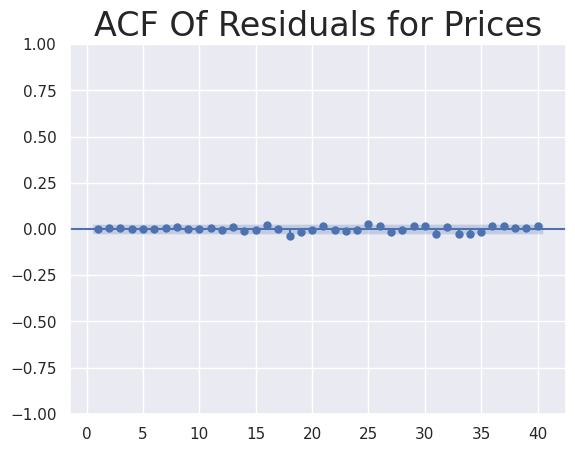

In [43]:
sgt.plot_acf(df.res_price, zero = False, lags = 40)
plt.title("ACF Of Residuals for Prices",size=24)
plt.show()

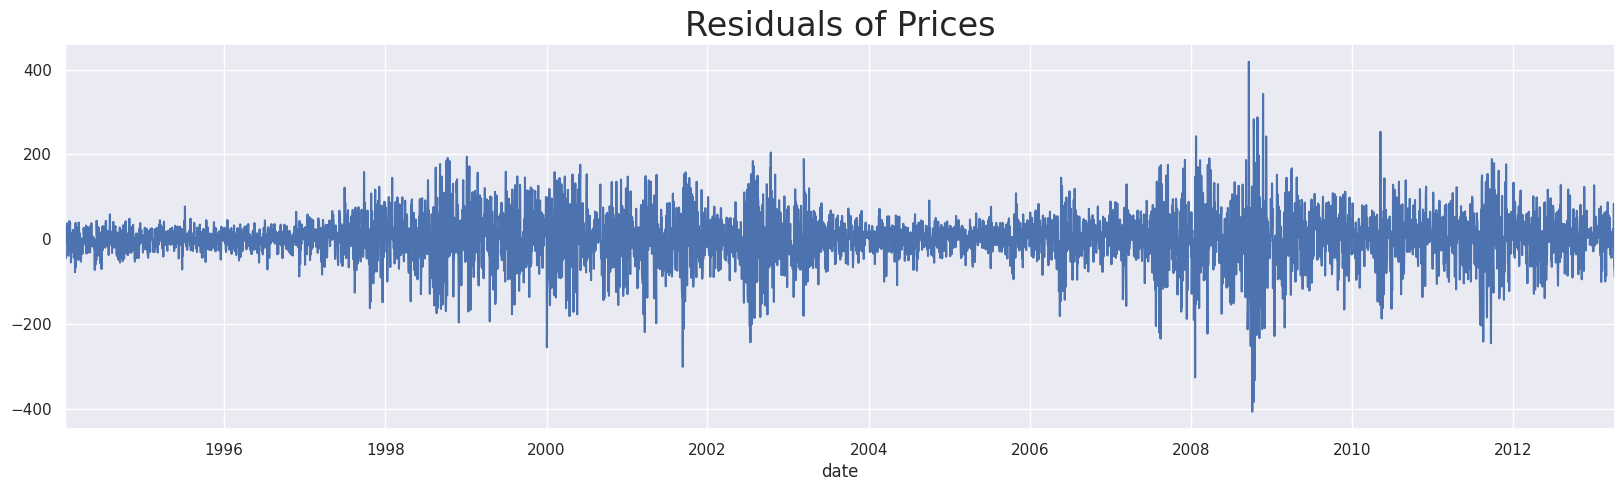

In [44]:
df.res_price[1:].plot(figsize=(20,5))
plt.title("Residuals of Prices",size=24)
plt.show()